Documentation de la base de données disponible ici : https://challengedata.ens.fr/challenges/87 
-> Pb potentiel : 96% valeurs manquantes pour gender_pay_gap


In [1]:
!pip install chardet
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 22.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import chardet
import math
from statistics import mode

In [ ]:
pd.set_option("display.max_columns", 35)
pd.set_option("display.max_rows", 15)

In [7]:
# Chargement de toutes les données
file_raw_path = "data/ESG_raw_data_07_02.xlsx"
raw_data = pd.read_excel(file_raw_path)

In [12]:
# Variables disponibles, toutes numériques
variables = ["market_cap", "employees", "revenue", "scope_1", "scope_2", "scope_3",
                         "waste_production", "waste_recycling", "water_consumption",
                         "water_withdrawal", "energy_consumption", "hours_of_training",
                         "gender_pay_gap", "independent_board_members_percentage",
                         "legal_costs_paid_for_controversies", "ceo_compensation"]

variables_env = ["scope_1", "scope_2", "scope_3",
                "waste_production", "waste_recycling", "water_consumption",
                "water_withdrawal", "energy_consumption"]

variables_eg = ["hours_of_training","gender_pay_gap", "independent_board_members_percentage",
                "legal_costs_paid_for_controversies", "ceo_compensation"]

# Années 
annees = ["2018", "2019", "2020"]

# Regions 
regions = ["Africa / Middle East", "Asia / Pacific", "Europe", 
           "Latin America and Caribbean", "United States and Canada"]

# Secteurs 
secteurs = raw_data['primary_industry'].unique()


raw_data.head()

,company_id,year,company_name,ticker,LEI,isin,Business Desc.,region,hq_country,primary_industry,...,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation,gender_pay_gap
0,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2020,Apple Inc.,NasdaqGS:AAPL,HWUPKR0MPOU8FGXBT394,US0378331005,"Apple Inc. designs, manufactures, and markets ...",United States and Canada,United States,"Technology Hardware, Storage and Peripherals",...,45705.80000,28939.8200,4.875000e+06,4.875000e+06,3.019170e+06,NaN,0.008571,0.00,14769259.0,NaN
1,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2019,Apple Inc.,NasdaqGS:AAPL,HWUPKR0MPOU8FGXBT394,US0378331005,"Apple Inc. designs, manufactures, and markets ...",United States and Canada,United States,"Technology Hardware, Storage and Peripherals",...,58395.94000,32806.4100,4.890152e+06,4.992424e+06,2.889680e+06,NaN,0.008571,1.85,11555466.0,NaN
2,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2018,Apple Inc.,NasdaqGS:AAPL,HWUPKR0MPOU8FGXBT394,US0378331005,"Apple Inc. designs, manufactures, and markets ...",United States and Canada,United States,"Technology Hardware, Storage and Peripherals",...,52849.83673,30104.5941,4.765152e+06,4.924242e+06,2.676460e+06,NaN,0.008750,NaN,15682219.0,NaN
3,9ea5e71e-33ac-4916-9c58-50ce9fa54abe,2020,Saudi Arabian Oil Company,SASE:2222,5586006WD91QHB7J4X50,SA14TG012N13,Saudi Arabian Oil Company operates as an integ...,Africa / Middle East,Saudi Arabia,Integrated Oil and Gas,...,NaN,NaN,3.615000e+07,3.615000e+07,1.495640e+08,NaN,0.454540,0.00,NaN,NaN
4,9ea5e71e-33ac-4916-9c58-50ce9fa54abe,2019,Saudi Arabian Oil Company,SASE:2222,5586006WD91QHB7J4X50,SA14TG012N13,Saudi Arabian Oil Company operates as an integ...,Africa / Middle East,Saudi Arabia,Integrated Oil and Gas,...,NaN,NaN,NaN,NaN,1.212160e+08,NaN,0.454540,NaN,NaN,NaN


In [29]:
all_r2 = []
count = 0

#for x in variables_env, y in variables_eg, a in annees, r in regions, s in secteurs :
for x in variables_env :
    for y in variables_eg :
        for a in ["2020"] :
            for r in ["Europe"] :
                for s in secteurs :
                    count+= 1
                    data = pd.DataFrame(imp_data[(imp_data["year"] == int(a)) & (imp_data["primary_industry"] == s) & (imp_data["region"] == r)])
                    if data[x].size > 5 and data[y].size > 5 :
                        slope, intercept, r_value, p_value, std_err = linregress(data[x], data[y])
                        r_squared = r_value ** 2
                        all_r2.append([r_squared, s])
print(count)

6160


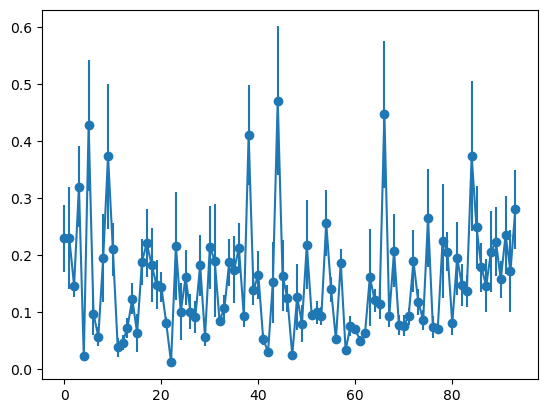

In [60]:
tri_secteurs = []

all_r2 = np.array(all_r2)

for s in secteurs :
    filtre = np.array(all_r2[all_r2[:, 1] == s][:,0], dtype = float)
    if filtre.size != 0 :
        min = np.min(filtre)
        mean = np.mean(filtre)
        max = np.max(filtre)
        err = np.var(filtre)
        tri_secteurs.append([mean, min, max, err, s])

tri_secteurs = np.array(tri_secteurs)
x = np.arange(len(tri_secteurs))
y = np.array(tri_secteurs[:,0], dtype = float)

plt.scatter(x, y)

y_err = np.array(tri_secteurs[:,3], dtype=float)
plt.errorbar(x, y, yerr = y_err)

plt.show()

In [10]:
#Part des entreprises qui ne paient aucune amende (sont-ce bien des amendes?)
imp_data['legal_costs_paid_for_controversies'].value_counts()[0]/nblignes

0.3054939093554273

In [13]:
#Stats rapides sur les données numériques
def stats(liste):
    m = mode(liste)
    if np.isnan(m):
        return([np.mean(liste),np.min(liste),np.max(liste),np.std(liste),np.mean(np.log1p(liste)),np.min(np.log1p(liste)),np.max(np.log1p(liste)),np.std(np.log1p(liste)),len(liste.unique()),m,'NaN'])
    return([np.mean(liste),np.min(liste),np.max(liste),np.std(liste),np.mean(np.log1p(liste)),np.min(np.log1p(liste)),np.max(np.log1p(liste)),np.std(np.log1p(liste)),len(liste.unique()),m,liste.value_counts()[m]])

#Toutes données
listestats=[]
for i in variables:
    listestats.append(stats(imp_data[i]))
datastats = pd.DataFrame(np.transpose(listestats),columns=variables,index=['moyenne','min','max','std','moyennelog','minlog','maxlog','stdlog','nb_values','mode','nb_mode'])
display(datastats)

#Par régions
for j in regions:
    listestats=[]
    datar=imp_data[imp_data['region']==j]
    for i in variables:
        listestats.append(stats(datar[i]))
    datastats = pd.DataFrame(np.transpose(listestats),columns=variables,index=['moyenne','min','max','std','moyennelog','minlog','maxlog','stdlog','nb_values','mode','nb_mode'])
    print(j)
    display(datastats)

,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
moyenne,6.232363e+03,1.206209e+04,3368.859507,1.485126e+06,4.487959e+05,6.857569e+06,1.370462e+07,6.269067e+05,4.688583e+07,1.967612e+08,3.711305e+07,5.469885e+05,2.327466e+00,0.563926,58.326954,1.374218e+07
min,3.676000e+01,1.000000e+00,-13944.090000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.100000e+00,0.000000,0.000000,9.768000e+03
max,2.251352e+06,2.300000e+06,460983.530000,5.538870e+08,4.059380e+08,1.679000e+10,2.797400e+10,8.434910e+07,6.934110e+10,9.156512e+10,8.167006e+10,1.482950e+08,4.420000e+01,1.000000,14830.200000,5.929000e+09
std,3.977866e+04,3.909027e+04,12976.189513,7.718823e+06,3.674240e+06,1.248129e+08,1.598835e+08,1.481749e+06,6.435403e+08,1.292035e+09,4.196974e+08,1.766736e+06,2.295728e+00,0.178272,218.937707,4.097939e+07
moyennelog,7.369190e+00,8.178858e+00,6.464067,1.267621e+01,1.197117e+01,1.389494e+01,1.530179e+01,1.287832e+01,1.623662e+01,1.772220e+01,1.672006e+01,1.266955e+01,-inf,0.440671,2.672291,1.631756e+01
minlog,3.631250e+00,6.931472e-01,-0.430783,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000,0.000000,9.186969e+00
maxlog,1.462704e+01,1.464842e+01,13.041120,2.013247e+01,1.982171e+01,2.354405e+01,2.405454e+01,1.825047e+01,2.496230e+01,2.524032e+01,2.512595e+01,1.881471e+01,3.811097e+00,0.693147,9.604488,2.250312e+01
stdlog,1.312375e+00,1.582770e+00,1.806243,2.923557e+00,2.207257e+00,3.059139e+00,2.504685e+00,1.473947e+00,2.302496e+00,2.580689e+00,1.941337e+00,1.537337e+00,NaN,0.114656,2.014958,4.612749e-01
nb_values,1.319800e+04,2.044100e+04,36137.000000,3.804300e+04,3.833700e+04,3.791900e+04,3.833500e+04,3.877700e+04,3.892200e+04,3.878200e+04,3.900100e+04,3.903400e+04,3.937500e+04,32492.000000,24976.000000,3.996400e+04
mode,6.588100e+02,2.000000e+03,3140.613849,9.689000e+03,1.858300e+04,2.188500e+04,2.856180e+04,1.530900e+04,5.120004e+05,1.026612e+06,6.205000e+05,1.448855e+05,1.000000e+00,0.500000,0.000000,4.206858e+06


Africa / Middle East


/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
moyenne,9.756821e+03,9376.929406,2125.737402,1.250282e+06,4.154115e+05,5.273799e+06,1.194437e+07,6.550847e+05,3.045883e+07,1.601133e+08,3.422256e+07,5.082123e+05,1.705544,0.548970,37.850082,1.419851e+07
min,2.510200e+02,7.000000,-4310.861696,6.660000e-01,4.413000e+00,0.000000e+00,8.000000e-02,1.000000e+01,0.000000e+00,2.793620e+03,6.380556e+01,9.200000e+02,-3.793496,0.111110,0.000000,1.274995e+05
max,2.105957e+06,147478.000000,316776.240000,1.740000e+08,6.587805e+07,1.876925e+09,2.799020e+08,4.020000e+07,2.098540e+09,5.702009e+09,6.100000e+08,1.255290e+07,21.899143,1.000000,1377.148153,4.600205e+08
std,9.744822e+04,14607.024247,12820.472017,5.130949e+06,1.832916e+06,5.035283e+07,1.740225e+07,1.544064e+06,6.796527e+07,2.979361e+08,3.186308e+07,8.028128e+05,1.529418,0.132523,70.927817,2.061874e+07
moyennelog,7.728975e+00,8.450877,6.522446,1.229735e+01,1.171956e+01,1.343232e+01,1.548702e+01,1.296402e+01,1.621384e+01,1.761934e+01,1.691631e+01,1.289766e+01,0.859858,0.433902,2.321603,1.637595e+01
minlog,5.529508e+00,2.079442,0.254642,5.104255e-01,1.688803e+00,0.000000e+00,7.696104e-02,2.397895e+00,0.000000e+00,7.935451e+00,4.171391e+00,6.825460e+00,-3.227733,0.105360,0.000000,1.175588e+01
maxlog,1.456028e+01,11.901441,12.665954,1.897457e+01,1.800332e+01,2.135290e+01,1.944995e+01,1.750938e+01,2.146451e+01,2.246408e+01,2.022897e+01,1.634546e+01,3.131099,0.693147,7.228496,1.994678e+01
stdlog,1.180192e+00,1.338545,1.435108,3.450668e+00,2.548942e+00,3.594150e+00,2.298099e+00,1.418139e+00,2.339109e+00,2.608498e+00,1.542941e+00,6.234368e-01,0.611554,0.086169,1.958149,2.901165e-01
nb_values,4.720000e+02,1354.000000,1403.000000,1.402000e+03,1.399000e+03,1.367000e+03,1.367000e+03,1.402000e+03,1.377000e+03,1.379000e+03,1.378000e+03,1.403000e+03,1402.000000,1244.000000,890.000000,1.407000e+03
mode,2.105957e+06,15000.000000,-907.136471,9.689000e+03,1.858300e+04,2.188500e+04,2.856180e+04,1.530900e+04,5.120004e+05,1.026612e+06,6.205000e+05,1.448855e+05,1.000000,0.333330,0.000000,4.206858e+06


/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Asia / Pacific


,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
moyenne,3363.042670,9637.173851,2448.854518,1.526218e+06,4.570103e+05,5.329031e+06,1.427443e+07,6.476410e+05,3.961137e+07,1.917993e+08,3.680437e+07,5.369696e+05,1.768741,0.483317,48.211309,1.368755e+07
min,36.760000,1.000000,-12530.573584,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.777778e-03,2.760000e+00,-7.304330,0.076923,0.000000,2.784890e+05
max,358235.760000,969696.000000,410650.320000,3.500510e+08,3.394229e+08,2.301200e+09,2.797400e+10,5.924560e+07,2.939164e+10,9.156512e+10,3.183147e+09,1.482950e+08,35.354890,1.000000,14830.200000,7.292086e+08
std,11876.530836,28434.932936,10074.762981,8.117897e+06,3.596868e+06,3.377282e+07,1.955966e+08,1.093368e+06,3.169047e+08,1.091134e+09,5.902688e+07,1.827504e+06,1.506445,0.107977,190.006779,1.089060e+07
moyennelog,7.119264,8.147522,6.224226,1.309534e+01,1.229828e+01,1.429166e+01,1.573287e+01,1.316589e+01,1.659628e+01,1.816346e+01,1.706243e+01,1.290341e+01,0.885152,0.391728,2.607134,1.639684e+01
minlog,3.631250,0.693147,-0.430783,0.000000e+00,0.000000e+00,0.000000e+00,9.950331e-03,6.931472e-01,0.000000e+00,0.000000e+00,2.773927e-03,1.324419e+00,-9.139275,0.074108,0.000000,1.253714e+01
maxlog,12.788949,13.784739,12.925500,1.967359e+01,1.964276e+01,2.155670e+01,2.405454e+01,1.789720e+01,2.410398e+01,2.524032e+01,2.188114e+01,1.881471e+01,3.593329,0.693147,9.604488,2.040747e+01
stdlog,1.141585,1.398110,1.697069,2.564905e+00,1.872342e+00,2.687271e+00,2.052485e+00,9.411789e-01,1.899352e+00,2.165784e+00,1.512081e+00,5.994314e-01,0.625321,0.070881,1.984361,1.946119e-01
nb_values,7946.000000,14707.000000,22095.000000,2.360300e+04,2.373000e+04,2.340900e+04,2.351500e+04,2.386800e+04,2.379600e+04,2.373800e+04,2.360100e+04,2.397600e+04,23923.000000,21909.000000,15614.000000,2.401600e+04
mode,440.880000,3049.000000,163.897875,9.689000e+03,1.858300e+04,2.188500e+04,2.856180e+04,1.530900e+04,5.120004e+05,1.026612e+06,6.205000e+05,1.448855e+05,1.000000,0.333330,0.000000,4.206858e+06


Europe


/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/mamba/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
moyenne,6870.702435,18056.938669,5226.248246,1.819919e+06,5.259120e+05,1.641155e+07,1.117623e+07,6.385143e+05,5.317741e+07,1.963119e+08,2.926707e+07,4.763373e+05,3.076176,0.605313,80.414870,1.432015e+07
min,223.190000,2.000000,-13944.090000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.100000,0.000000,0.000000,9.768000e+03
max,303434.020000,671205.000000,261769.530000,5.538870e+08,4.059380e+08,1.679000e+10,2.590880e+09,8.434910e+07,6.934110e+10,4.720000e+10,1.149333e+10,2.014746e+07,44.200000,1.000000,5666.000000,5.929000e+09
std,20388.442779,46373.786954,14491.688272,1.094380e+07,5.914746e+06,3.245190e+08,8.387048e+07,3.016510e+06,9.689269e+08,1.350611e+09,2.603632e+08,1.007137e+06,3.706035,0.226710,269.444496,1.073190e+08
moyennelog,7.534701,8.269731,6.952265,1.184709e+01,1.133002e+01,1.315859e+01,1.323081e+01,1.165343e+01,1.512052e+01,1.649660e+01,1.496340e+01,1.141327e+01,-inf,0.462186,2.621031,1.586996e+01
minlog,5.412494,1.098612,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000,0.000000,9.186969e+00
maxlog,12.622923,13.416831,12.475224,2.013247e+01,1.982171e+01,2.354405e+01,2.167526e+01,1.825047e+01,2.496230e+01,2.457766e+01,2.316503e+01,1.681859e+01,3.811097,0.693147,8.642415,2.250312e+01
stdlog,1.403647,1.928197,1.925242,3.137807e+00,2.424653e+00,3.400934e+00,3.635109e+00,2.528572e+00,2.898372e+00,3.028599e+00,2.988889e+00,3.305072e+00,NaN,0.153998,2.072010,9.872973e-01
nb_values,1850.000000,4361.000000,5486.000000,5.192000e+03,4.942000e+03,5.019000e+03,5.021000e+03,4.780000e+03,4.907000e+03,4.785000e+03,5.373000e+03,4.927000e+03,5106.000000,2298.000000,3214.000000,5.434000e+03
mode,589.860000,1000.000000,44651.000000,9.689000e+03,1.858300e+04,2.188500e+04,2.856180e+04,1.530900e+04,5.120004e+05,1.026612e+06,6.205000e+05,1.448855e+05,1.000000,1.000000,0.000000,4.206858e+06


/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Latin America and Caribbean


,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
moyenne,3424.974575,14357.724988,2126.917311,1.172900e+06,3.549074e+05,3.814898e+06,1.887181e+07,6.094632e+05,5.204987e+07,3.071457e+08,3.115388e+07,7.299364e+05,1.501307,0.533852,77.841846,1.403279e+07
min,307.130000,2.000000,-5426.058040,8.710000e-01,9.900000e-01,5.010000e-01,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.257000e+03,6.543500e+03,-6.739652,0.111110,0.000000,4.206858e+06
max,66491.410000,469000.000000,46479.950000,2.958800e+07,5.500000e+06,1.520713e+08,3.004747e+09,9.319482e+06,6.834299e+09,7.056700e+10,1.979607e+08,4.464242e+07,36.222267,1.000000,5340.810000,4.034383e+08
std,6946.813664,33193.094528,4683.684552,1.660527e+06,3.263438e+05,6.357707e+06,1.178462e+08,4.791992e+05,2.765723e+08,2.657197e+09,1.630943e+07,2.200478e+06,1.983497,0.125553,225.855856,1.200554e+07
moyennelog,7.365954,8.506872,6.607988,1.247928e+01,1.154617e+01,1.345535e+01,1.542661e+01,1.299811e+01,1.644442e+01,1.788878e+01,1.679077e+01,1.303641e+01,0.739515,0.424316,2.952838,1.640469e+01
minlog,5.730522,1.098612,0.009950,6.264730e-01,6.881346e-01,4.061316e-01,1.098612e+00,1.098612e+00,0.000000e+00,0.000000e+00,7.137278e+00,8.786380e+00,-4.536244,0.105360,0.000000,1.525223e+01
maxlog,11.104843,13.058360,10.746798,1.720288e+01,1.552026e+01,1.883986e+01,2.182346e+01,1.604762e+01,2.264522e+01,2.497983e+01,1.910358e+01,1.761420e+01,3.616907,0.693147,8.583320,1.981553e+01
stdlog,1.110461,1.644385,1.534904,3.331971e+00,2.983910e+00,3.507600e+00,2.326387e+00,1.352962e+00,2.211320e+00,2.515606e+00,1.566100e+00,7.400195e-01,0.734993,0.084104,2.081910,2.480221e-01
nb_values,423.000000,1193.000000,1262.000000,1.265000e+03,1.260000e+03,1.201000e+03,1.226000e+03,1.262000e+03,1.242000e+03,1.229000e+03,1.218000e+03,1.271000e+03,1265.000000,1141.000000,930.000000,1.265000e+03
mode,571.560000,3049.000000,15935.450000,9.689000e+03,1.858300e+04,2.188500e+04,2.856180e+04,1.530900e+04,5.120004e+05,1.026612e+06,6.205000e+05,8.755030e+05,1.000000,0.500000,0.000000,4.206858e+06


/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


United States and Canada


,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
moyenne,1.431178e+04,1.535789e+04,5284.359138,1.218900e+06,3.910940e+05,5.614306e+06,1.322502e+07,5.537561e+05,6.665394e+07,2.010683e+08,4.496034e+07,6.042823e+05,3.742327,0.786997,74.166601,1.337925e+07
min,1.458700e+02,1.000000e+00,-7318.258418,0.000000e+00,6.840000e-01,0.000000e+00,3.080000e+00,2.100600e+00,0.000000e+00,0.000000e+00,6.126500e-01,7.000000e-01,-7.929471,0.004444,0.000000,1.563160e+05
max,2.251352e+06,2.300000e+06,460983.530000,1.160000e+08,1.240000e+08,2.487180e+09,3.673515e+09,4.510920e+07,5.794390e+10,7.117852e+10,8.167006e+10,6.955542e+07,41.829169,1.000000,10395.550000,2.806216e+08
std,7.425804e+04,5.934095e+04,18895.896474,3.647194e+06,2.044956e+06,4.096638e+07,7.909853e+07,8.373082e+05,1.061160e+09,1.560293e+09,9.131223e+08,2.018837e+06,2.387824,0.115666,269.671052,6.167527e+06
moyennelog,7.948879e+00,8.110532e+00,6.819570,1.207989e+01,1.153697e+01,1.335547e+01,1.538168e+01,1.282361e+01,1.589291e+01,1.722787e+01,1.685709e+01,1.273514e+01,1.454008,0.577912,2.922934,1.636417e+01
minlog,4.989548e+00,6.931472e-01,0.000000,0.000000e+00,5.211719e-01,0.000000e+00,1.406097e+00,1.131596e+00,0.000000e+00,0.000000e+00,4.778788e-01,5.306283e-01,-3.330499,0.004435,0.000000,1.195964e+01
maxlog,1.462704e+01,1.464842e+01,13.041120,1.856910e+01,1.863579e+01,2.163442e+01,2.202441e+01,1.762460e+01,2.478274e+01,2.498846e+01,2.512595e+01,1.805763e+01,3.757219,0.693147,9.249229,1.945252e+01
stdlog,1.545768e+00,1.839076e+00,1.999637,3.349008e+00,2.559073e+00,3.463008e+00,2.109474e+00,1.386502e+00,2.633576e+00,3.004476e+00,1.612804e+00,1.352584e+00,0.501636,0.077015,2.038036,3.128677e-01
nb_values,2.665000e+03,4.388000e+03,7753.000000,7.598000e+03,7.714000e+03,7.540000e+03,7.583000e+03,7.717000e+03,7.782000e+03,7.745000e+03,7.667000e+03,7.791000e+03,7830.000000,6276.000000,5358.000000,7.847000e+03
mode,3.412360e+03,2.000000e+03,3140.613849,1.472368e+06,1.858300e+04,2.188500e+04,2.856180e+04,1.530900e+04,5.120004e+05,1.026612e+06,6.205000e+05,1.448855e+05,5.882867,0.900000,0.000000,4.206858e+06
